In [80]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io

In [81]:
#loading dataset and reading it's content

zip_file_path="/content/archive (16) (2).zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

    file_names = zip_ref.namelist()
    with zip_ref.open("Unemployment in India.csv") as csv_file1:
        df_csv1 = pd.read_csv(csv_file1)

    with zip_ref.open("Unemployment_Rate_upto_11_2020.csv") as csv_file2:
        df_csv2 = pd.read_csv(csv_file2)

    display(df_csv1.head())
    display(df_csv2.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [82]:
#Data Preprocessing

print("Missing Value in First Dataset:\n", df_csv1.isnull().sum())
print("Missing Value in Second Dataset:\n", df_csv2.isnull().sum(), df_csv2.isnull().sum())

df_csv1["Date"]=pd.to_datetime(df_csv1["Date"], dayfirst=True)
df_csv2["Date"]=pd.to_datetime(df_csv2["Date"], dayfirst=True)


df_csv1.columns=df_csv1.columns.str.strip(),str.lower(), str.replace(" ", "_")
df_csv2.columns=df_csv2.columns.str.strip(),str.lower(),str.replace(" ", "_")

display("Data types before preprocessing:\n", df_csv1.dtypes)
display("Data types after preprocessing:\n", df_csv2.dtypes)



Missing Value in First Dataset:
 Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Missing Value in Second Dataset:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Ra

KeyError: 'Date'

In [83]:
#Exploratry Dat Analysis

display("Summary Statistics of First dataset:\n", df_csv1.describe())
display("Unique regions:\n", df_csv1["Region"].unique())
display("Unique frequency values:\n", df_csv1[" Frequency"].unique())

display("Summary Statistics of Second dataset:\n", df_csv2.describe())
display("Unique regions:\n", df_csv2["Region"].unique())
display("Unique frequency values:\n", df_csv2[" Frequency"].unique())

'Summary Statistics of First dataset:\n'

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


'Unique regions:\n'

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

'Unique frequency values:\n'

array([' Monthly', nan, 'Monthly'], dtype=object)

'Summary Statistics of Second dataset:\n'

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


'Unique regions:\n'

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

'Unique frequency values:\n'

array([' M'], dtype=object)

### Data visualization

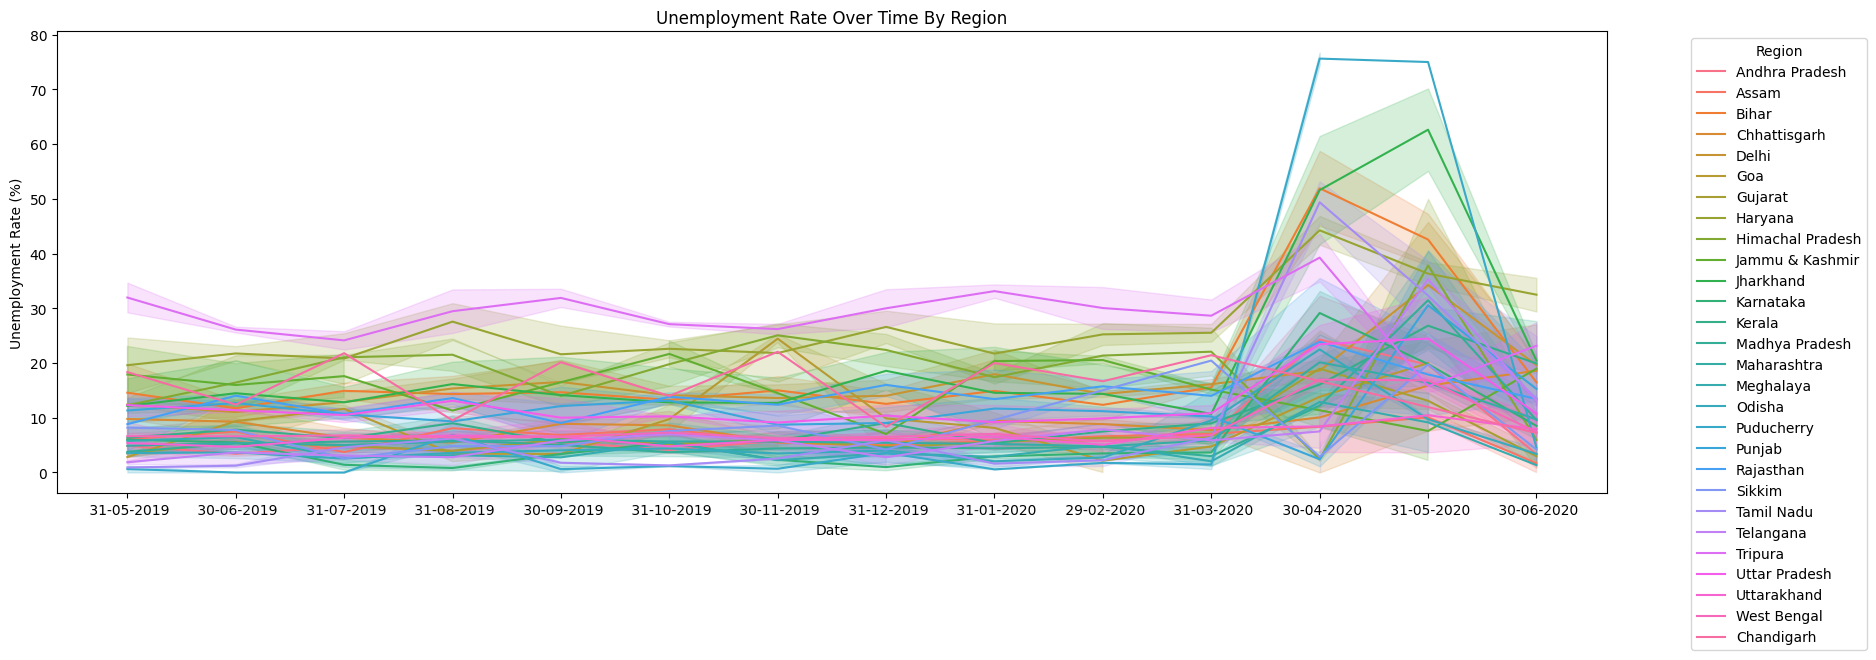

In [34]:
#Unemployment Rate Trends over Time

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_csv1, x=" Date", y=" Estimated Unemployment Rate (%)", hue="Region") # Changed 'Data' to 'data', 'X' to 'x', and "Region" to "region"
plt.title("Unemployment Rate Over Time By Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

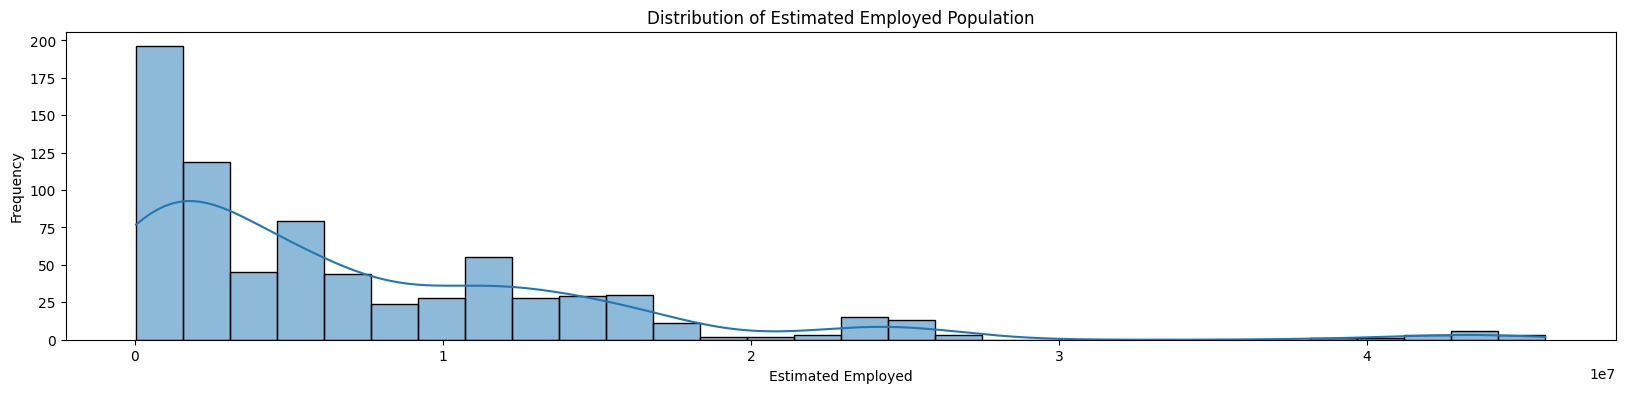

In [33]:
#Distribution Of estimated Employed Population

plt.figure(figsize=(20, 4))
sns.histplot(data=df_csv1[" Estimated Employed"],bins=30, kde=True)
plt.title("Distribution of Estimated Employed Population")
plt.xlabel("Estimated Employed")
plt.ylabel("Frequency")
plt.show()

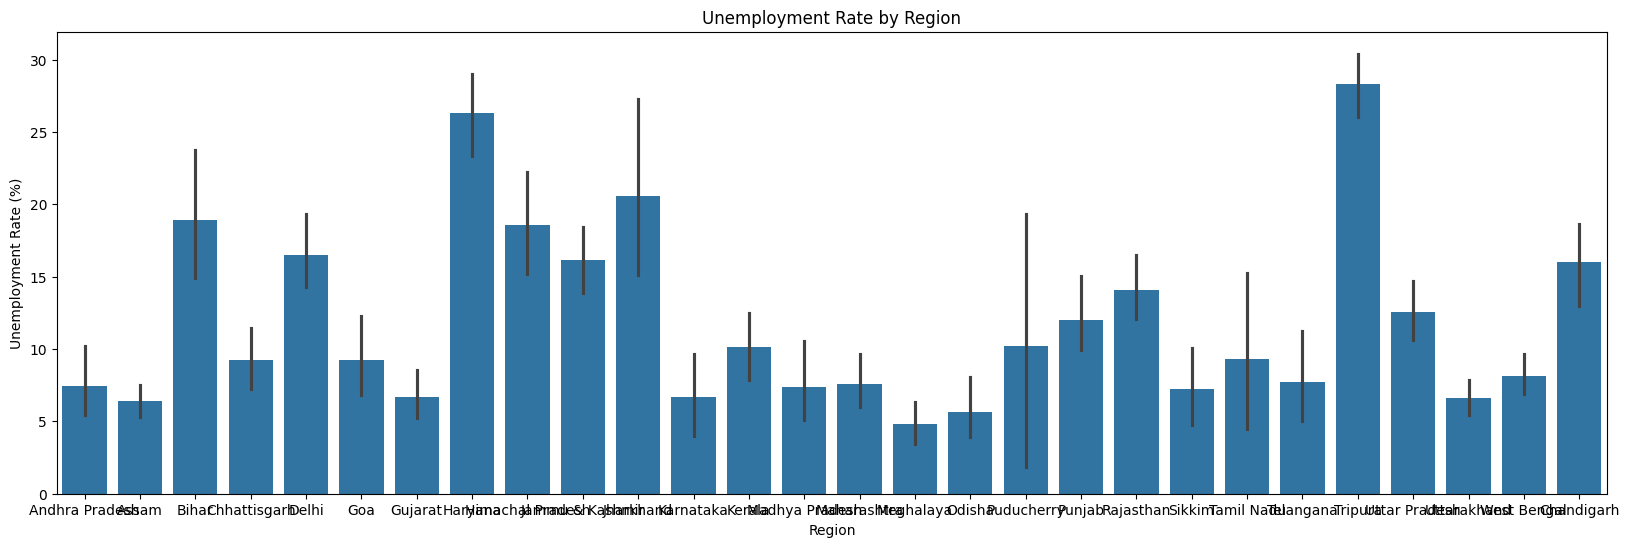

In [84]:
#Unemployment Rate by Region

plt.figure(figsize=(20, 6))
sns.barplot(data=df_csv1, x="Region", y=" Estimated Unemployment Rate (%)")
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()

#Statistical Analysis


Text(0.5, 1.0, 'Correlation Matrix of Unemployment Data')

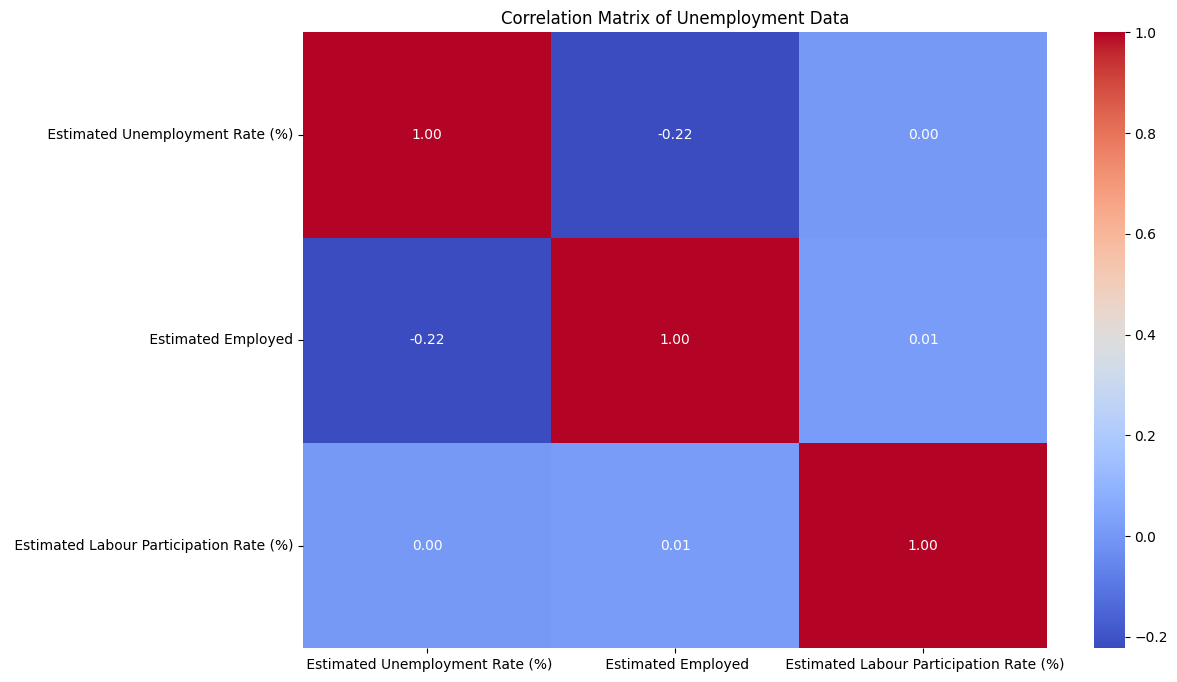

In [43]:
numeric_df = df_csv1.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Unemployment Data")

In [85]:
#Modelling(Linear Regression)

X = df_csv1[[" Estimated Employed", " Estimated Unemployment Rate (%)"]]
y = df_csv1[" Estimated Unemployment Rate (%)"]

df_cleaned = df_csv1.dropna(subset=[" Estimated Employed", " Estimated Unemployment Rate (%)"])
# Corrected column name to match the name in the DataFrame: ' Estimated Employed'
X= df_cleaned[[" Estimated Employed"]]
y= df_cleaned[[" Estimated Unemployment Rate (%)"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse} ")


Mean Absolute Error: 8.310538260295845
Mean Squared Error: 138.1631513822582 


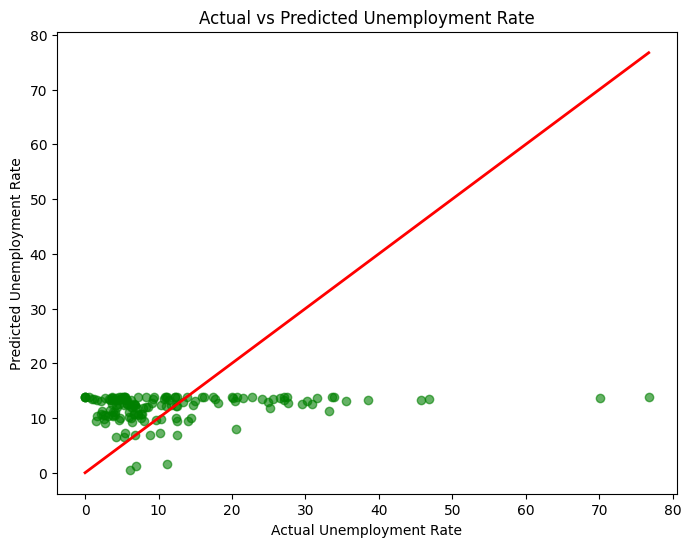

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred,color="Green", alpha=0.6)

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r',lw=2)

plt.xlabel("Actual Unemployment Rate")
plt.ylabel("Predicted Unemployment Rate")
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()

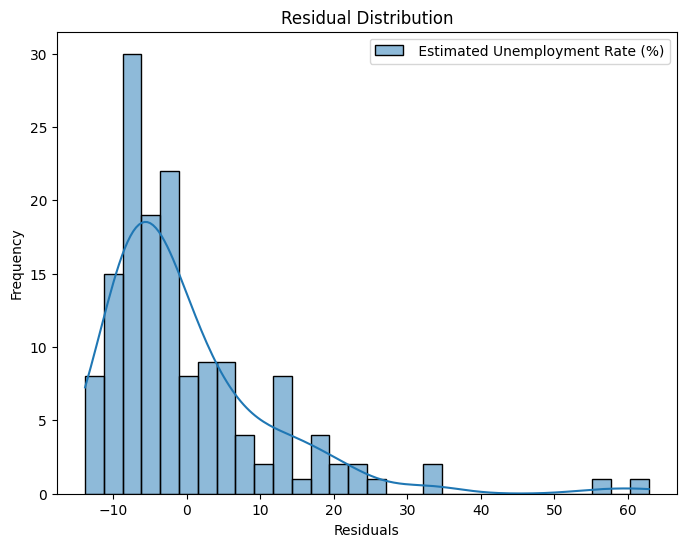

In [78]:
#Residual Plotting

Residuals =y_test-y_pred
plt.figure(figsize=(8,6))
sns.histplot(Residuals,bins=30,kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# #Final Insights
- The residual are normally distributed ,meaning the model is unbiased
- A scatter plot shows most predictions align closely with actual values
-
Higher unemployment rates tend to have slightly higher prediction errors

In [90]:
import joblib
# Assign the model you want to save to the variable 'model'
model = model  # Changed 'rf' to 'model'

joblib.dump(model, "model.pkl")
print(" Model saved as model.pkl ")

 Model saved as model.pkl 


In [91]:
pip freeze > requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')